In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from PIL import Image

## Check Images
Example of tampered images (in Tp folder) -- Originally in .jpg or .tif format

In [31]:
tp1_path = "dataset/unzip/CASIA2/Tp/Tp_D_NNN_S_N_ind00093_cha00023_00487.tif"

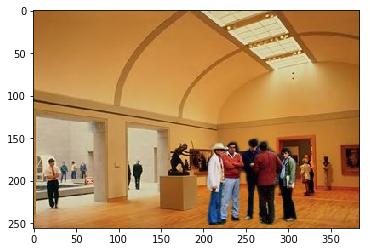

In [32]:
tp1 = mpimg.imread(tp1_path)
imgplot = plt.imshow(tp1)
plt.show()

In [33]:
tp2_path = "dataset/unzip/CASIA2/Tp/Tp_S_CRN_S_N_ani10221_ani10221_12391.jpg"

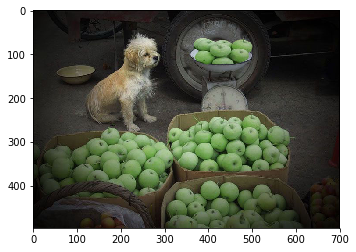

In [35]:
tp2 = mpimg.imread(tp2_path)
imgplot = plt.imshow(tp2)
plt.show()

## Convert tif files to jpg files

In [42]:
def convertImageFormat(root): 
    extra_counter = 0
    for infile in os.listdir(root):
        # print(os.path.join(dir_path, infile))
        if infile.endswith('.tif') or infile.endswith('.TIF'):
            if os.path.isfile(os.path.splitext(os.path.join(root, infile))[0] + ".jpg"):
                    print("A jpg file already exists for %s" % infile)
                    outfile = infile[:-4] + "_" + extra_counter + ".jpg"
                    extra_counter += 1
            else: 
                outfile = infile[:-3] + "jpg"
                im = Image.open(os.path.join(root, infile))
                out = im.convert("RGB")
                # outputfile = os.path.splitext(os.path.join(root, name))[0] + ".jpg"
                out.save(os.path.join(root, outfile), "JPEG", quality=90)
                os.remove(os.path.join(root, infile))

In [43]:
# made a smallset of data to test this function
convertImageFormat(root = "dataset/unzip/CASIA2/Tp")

## Divide dataset into train/dev/test 

In [45]:
import random
import shutil

In [62]:
def split_dataset(root, c, dest):
    # root = "dataset/unzip/Au"
    files = os.listdir(root)
    k = c * (len(files))
    indices = random.sample(range(0, len(files)), int(k))
    for i in indices:
        selected = files[i]
        shutil.move(os.path.join(root, selected), os.path.join(dest, selected))
    

In [63]:
split_dataset(root = "./dataset/unzip/CASIA2/Au", c = 0.05, dest = "./dataset/dev/Au")

In [64]:
split_dataset(root = "./dataset/unzip/CASIA2/Tp", c = 0.05, dest = "./dataset/dev/Tp")

In [65]:
split_dataset(root = "./dataset/unzip/CASIA2/Au", c = 0.05, dest = "./dataset/test/Au")
split_dataset(root = "./dataset/unzip/CASIA2/Tp", c = 0.05, dest = "./dataset/test/Tp")

## Check divided dataset

In [66]:
files = os.listdir("./dataset/unzip/CASIA2/Au")

In [67]:
len(files)

6763